In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from pathlib import Path
import os
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from descartes import PolygonPatch
import alphashape
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import Point
import math
from scipy.stats import kde
import hdbscan
from sklearn.cluster import DBSCAN
from scipy.spatial import Delaunay
from collections import defaultdict
from itertools import permutations
import plotly.figure_factory as ff
import matplotlib.cm as cm
import itertools
from scipy.stats import wilcoxon #Wilcoxon is nonparametric, paired data = paired student T test ***
from scipy.stats import pearsonr

In [4]:
#Data-Wrangling with DBSCAN results

#clean, extract, and export useful data
folder_location="C:/Users/DrHeh/Google Drive/From Dropbox/samples/DCs1"
dir=Path(folder_location)
os.chdir(folder_location)
for f in os.listdir(dir):
    if f.endswith(".csv"):
        df = pd.read_csv(f, sep=",")
        
        Data = {"Pt":[],"Phenotype":[], "Cluster":[], "X":[], "Y":[]} 
        Data["Pt"] = df["Path"][1].split("\\")[-3]
        Data["Cluster"] = df["DBSCAN Cluster"]
        
        for column in df.columns.unique():
            if "Complex Complex Phenotype" in column:
                Data["Phenotype"] = df["Complex Complex Phenotype"]
            elif "Complex.Complex.Phenotype" in column:
                Data["Phenotype"] = df["Complex.Complex.Phenotype"]  
            elif "Complex.Phenotype" in column:
                Data["Phenotype"] = df["Complex.Phenotype"]
            elif "Complex Phenotype" in column:
                Data["Phenotype"] = df["Complex Phenotype"]                
            elif "Phenotype" in column:
                Data["Phenotype"] = df["Phenotype"]
                
        for column in df.columns.unique():
            if "Cell X Position NEW" in column:
                Data["X"] = df["Cell X Position NEW"].round(1) 
                Data["Y"] = df["Cell Y Position NEW"].round(1)
            elif "Cell.X.Position" in column:
                Data["X"] = df["Cell.X.Position"].round(1) 
                Data["Y"] = df["Cell.Y.Position"].round(1)
                
        Data_df=pd.DataFrame(Data)
        
        #This script is necessary because every sample has different numbers of "Belong to DBSCAN..." columns.
        Belong =[]
        for j in df.columns:
            if "Belong to DBSCAN" in j:
                Belong.append(j)
                
        for b in np.arange(0,len(Belong)):
            Data_df["Belong to DBSCAN cluster%s"%b] = df[["Belong to DBSCAN cluster%s"%b]]
            
        Data_df_clean = Data_df.replace({"Phenotype":{"CD8+OthersOthers":"CD8+",
                                              "CD141+OthersOthers":"CD141+PD-L1-",
                                              "OthersOthersOthers":"Others",
                                              "CD141+PD-L1Others":"CD141+PD-L1+",
                                              "OthersPD-L1Others":"Others",
                                              "CD8+PD-L1Others":"CD8+",
                                              "OthersOthersCD1a+":"CD1a+PD-L1-",
                                              "CD141+PD-L1CD1a+":"CD1a+PD-L1+",
                                              "OthersPD-L1CD1a+":"CD1a+PD-L1+",
                                              "CD141+OthersCD1a+":"CD1a+PD-L1-",
                                              "CD8+OthersCD1a+":"CD8+",
                                              "CD8+PD-L1CD1a+":"CD8+",
                                              "OthersOthersCD1a":"CD1a+PD-L1-",
                                              "CD141+PD-L1CD1a":"CD1a+PD-L1+",
                                              "OthersPD-L1CD1a":"CD1a+PD-L1+",
                                              "CD141+OthersCD1a":"CD1a+PD-L1-",
                                              "CD8+OthersCD1a":"CD8+",
                                              "CD8+PD-L1CD1a":"CD8+",
                                              "OthersPD-L1-":"Others",
                                              "OthersPD-L1+":"Others",
                                              "CD8+PD-L1-":"CD8+",
                                              "CD8+PD-L1+":"CD8+",
                                              "OthersPDL1-":"Others",
                                              "OthersPDL1+":"Others",
                                              "CD8+PDL1-":"CD8+",
                                              "CD8+PDL1+":"CD8+",
                                              "CD141+PDL1-":"CD141+PD-L1-",
                                              "CD141+PDL1+":"CD141+PD-L1+",
                                              "CD1a+PDL1-":"CD1a+PD-L1-",
                                              "CD1a+PDL1+":"CD1a+PD-L1+",
                                               "CD141+Others":"CD141+PD-L1-",
                                               "OthersOthers":"Others",
                                               "CD8+Others":"CD8+",
                                               "CD1a+Others":"CD1a+PD-L1-",
                                               "CD141+PD-L1":"CD141+PD-L1+",
                                               "OthersPD-L1":"Others",
                                               "CD8+PD-L1":"CD8+",
                                               "CD1a+PD-L1":"CD1a+PD-L1+",
                                                "CD8+OthersOthers":"CD8+",
                                                "OthersPD-L1Others":"Others",
                                                "CD8+PD-L1Others":"CD8+",
                                                "CD141+PD-L1CD1a+":"CD1a+PD-L1+",
                                                "OthersOthersCD1a+":"CD1a+PD-L1-",
                                                "CD141+OthersCD1a+":"CD1a+PD-L1-",
                                                "CD8+PD-L1CD1a+":"CD8+",
                                                "CD8+OthersCD1a+":"CD8+"}})
     

        Data_df_clean.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs1_res/Res_"+
                            df["Path"][1].split("\\")[-3]+".txt")

In [5]:
# Import and concat to one: 
file = []
folder_location="C:/Users/DrHeh/Google Drive/programming/samples/DCs1_res"
dir=Path(folder_location)
os.chdir(folder_location)
for f in os.listdir(dir):
    if f.endswith(".txt"):
        file.append(pd.read_csv(f, sep=","))
        df_DCs = pd.concat(file)
df_DCs.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs1_res/Res_all.txt")

In [25]:
# Cluster Type
df_DCs = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs1_res/Res_all.txt")
df_DCs_cluster = df_DCs[["Pt", "Phenotype", "Cluster"]]
df_Cluster = df_DCs_cluster.dropna(subset=["Cluster"])
df_Cluster_clean = df_Cluster[~df_Cluster.Phenotype.isin(["CD8+","Others"])]
df_Cluster_pv = df_Cluster_clean.pivot_table(index=["Pt","Cluster"], columns=["Phenotype"], 
aggfunc=lambda x: len(x))
df_Cluster_pv.reset_index(inplace = True)
df_Cluster_pv.insert(2, "c_Type", "N")
df_Cluster_pv1 = df_Cluster_pv.fillna(0)
df_Cluster_pv1.loc[(df_Cluster_pv1["CD1a+"]+df_Cluster_pv1["CD1a+PD-L1+"]+df_Cluster_pv1["CD1a+PD-L1-"]==0),"c_Type"]="cDC1-h"
df_Cluster_pv1.loc[(df_Cluster_pv1["CD1a+"]+df_Cluster_pv1["CD141+PD-L1+"]+df_Cluster_pv1["CD141+PD-L1-"]==0),"c_Type"]="CD1a-h"
df_Cluster_pv1.loc[(df_Cluster_pv1.Cluster== -1.0),"c_Type"]="iso"
df_Cluster_pv2 = df_Cluster_pv1.replace({"c_Type":{"N":"Het"}})
df_Cluster_pv2.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/c_Type.txt")
cType = df_Cluster_pv2[["Pt", "Cluster", "c_Type"]]

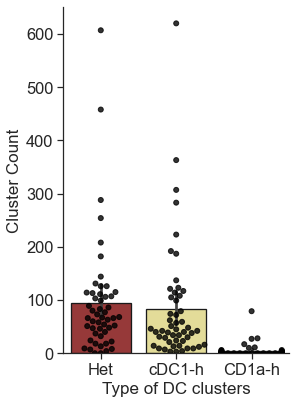

In [26]:
# Count # of clusters in Pts
df_Cluster_pv2 = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/c_Type.txt")
cluster_ct = df_Cluster_pv2.pivot_table(index=["Pt"], values=["Cluster"],columns = ["c_Type"], 
aggfunc=lambda x: len(x))
cluster_ct.reset_index(inplace = True)
cluster_ct_all = pd.melt(cluster_ct, id_vars=[(     'Pt',       '')], value_vars = [('Cluster',    'Het'), ('Cluster', 'cDC1-h'),
('Cluster', 'CD1a-h')])
cluster_ct_all_1 = cluster_ct_all.rename(columns={"value":"No. clusters"})
cluster_ct_all_2 = cluster_ct_all_1[cluster_ct_all_1.columns.dropna()].fillna(0)
cluster_ct_Pts = cluster_ct_all_2[~cluster_ct_all_2[('Pt', '')].isin(["Norm LN1x4","Norm LN2x4","Norm LN3x4","Norm LN4x4"])]
cluster_ct_Pts.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/c_Type_numbers_Pts.txt")

# Plot and save
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
g = sns.catplot(y='No. clusters', x='c_Type', data=cluster_ct_Pts, kind = "swarm", marker='o', alpha=0.8,color="black", 
                height = 6, aspect = .75, linewidth = 1)
sns.barplot(y='No. clusters', x='c_Type', data=cluster_ct_Pts, alpha=1,edgecolor="0.1", linewidth=1.3,ax = g.ax, 
            palette={"Het": "brown", "cDC1-h": "khaki", "CD1a-h": "black"})
plt.xlabel('Type of DC clusters', fontsize=17)
plt.ylabel('Cluster Count', fontsize=17)
g.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/fig1_count.tiff', format='tiff', dpi=600)
plt.show()

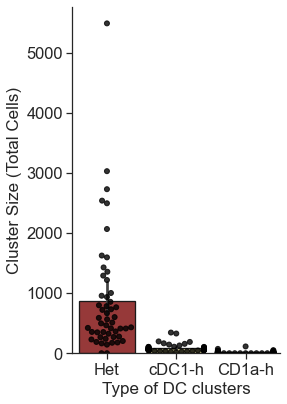

In [44]:
#Cluster Size of non-DCs
#0
df_cluster_cells = df_DCs[["Pt", "Phenotype", "Belong to DBSCAN cluster0"]]
df_cluster_cells1 = df_cluster_cells.dropna(subset=["Phenotype"])
df_cluster_cells2 = df_cluster_cells1.dropna(subset=["Belong to DBSCAN cluster0"])
df_cluster_cells2_pv = df_cluster_cells2.pivot_table(index=["Pt","Belong to DBSCAN cluster0"], 
columns=["Phenotype"], aggfunc=lambda x: len(x)).fillna(0)
df_cluster_cells2_pv.reset_index(inplace = True)
df_cluster_cells2_pv["Total"]=df_cluster_cells2_pv["CD1a+PD-L1+"]+df_cluster_cells2_pv["CD1a+PD-L1-"]+df_cluster_cells2_pv["CD8+"]+df_cluster_cells2_pv["Others"]
first_ = df_cluster_cells2_pv[["Pt", "Belong to DBSCAN cluster0", "Total"]].rename(columns = {"Belong to DBSCAN cluster0": "Cluster"})

#1
df_cluster_cellsA = df_DCs[["Pt", "Phenotype", "Belong to DBSCAN cluster1"]]
df_cluster_cells1A = df_cluster_cellsA.dropna(subset=["Phenotype"])
df_cluster_cells2A = df_cluster_cells1A.dropna(subset=["Belong to DBSCAN cluster1"])
df_cluster_cells2A_pv = df_cluster_cells2A.pivot_table(index=["Pt","Belong to DBSCAN cluster1"], 
columns=["Phenotype"], aggfunc=lambda x: len(x)).fillna(0)
df_cluster_cells2A_pv.reset_index(inplace = True)
df_cluster_cells2A_pv["TotalA"]=df_cluster_cells2A_pv["CD1a+PD-L1+"]+df_cluster_cells2A_pv["CD1a+PD-L1-"]+df_cluster_cells2A_pv["CD8+"]+df_cluster_cells2A_pv["Others"]
Second_ = df_cluster_cells2A_pv[["Pt", "Belong to DBSCAN cluster1", "TotalA"]].rename(columns = {"Belong to DBSCAN cluster1": "Cluster"})


#2
df_cluster_cellsB = df_DCs[["Pt", "Phenotype", "Belong to DBSCAN cluster2"]]
df_cluster_cells1B = df_cluster_cellsB.dropna(subset=["Phenotype"])
df_cluster_cells2B = df_cluster_cells1B.dropna(subset=["Belong to DBSCAN cluster2"])
df_cluster_cells2B_pv = df_cluster_cells2B.pivot_table(index=["Pt","Belong to DBSCAN cluster2"], 
columns=["Phenotype"], aggfunc=lambda x: len(x)).fillna(0)
df_cluster_cells2B_pv.reset_index(inplace = True)
df_cluster_cells2B_pv["TotalB"]=df_cluster_cells2B_pv["CD8+"]+df_cluster_cells2B_pv["Others"]
Third_ = df_cluster_cells2B_pv[["Pt", "Belong to DBSCAN cluster2", "TotalB"]].rename(columns = {"Belong to DBSCAN cluster2": "Cluster"})

#Cluster Size of non-DCs & cType
Alls = pd.concat([first_, Second_, Third_]).fillna(0)
Alls["Sum"]=Alls["Total"]+Alls["TotalA"]+Alls["TotalB"]
Alls_ = Alls[["Pt", "Cluster", "Sum"]]
Size_cType = pd.merge(Alls_, cType, how ="outer").fillna(0) 

#Cluster Size of DCs, add, total_final
df_Cluster_pv2["Total_DCs"]=df_Cluster_pv2["CD141+PD-L1+"]+df_Cluster_pv2["CD141+PD-L1-"]+df_Cluster_pv2["CD141+PD-L1+"]+df_Cluster_pv2["CD1a+PD-L1+"]+df_Cluster_pv2["CD1a+PD-L1-"]
Size_DCs = df_Cluster_pv2[["Pt", "Cluster", "Total_DCs"]].fillna(0)
Size_cType_all = pd.merge(Size_cType, Size_DCs, how = "outer")
Size_cType_all["Sum_all"] = Size_cType_all["Sum"]+Size_cType_all["Total_DCs"]
SIZE_cType = Size_cType_all[["Pt", "Cluster","c_Type", "Sum_all"]]
SIZE_cType.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/SIZE_c_Type.txt")

#Remove Normal sampels
BC_Size_cType = SIZE_cType[~SIZE_cType["Pt"].isin(["Norm LN1x4","Norm LN2x4","Norm LN3x4","Norm LN4x4"])]

# Generate matrix for Cluster Size
CD1a_h_size = BC_Size_cType[(BC_Size_cType["c_Type"]=="CD1a-h")].groupby("Pt")[["Sum_all"]].mean()
CD1a_h_size1 = CD1a_h_size.rename(columns={"Sum_all":"CD1a-h_Size"})
cDC1_h_size = BC_Size_cType[(BC_Size_cType["c_Type"]=="cDC1-h")].groupby("Pt")[["Sum_all"]].mean()
cDC1_h_size1 = cDC1_h_size.rename(columns={"Sum_all":"cDC1-h_size"})
Het_size = BC_Size_cType[(BC_Size_cType["c_Type"]=="Het")].groupby("Pt")[["Sum_all"]].mean()
Het_size1 = Het_size.rename(columns={"Sum_all":"Het_size"})
SIZE_cType_Pts = pd.concat([CD1a_h_size1, cDC1_h_size1, Het_size1], axis=1)
SIZE_cType_Pts.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/SIZE_cType_Pts.txt")

# Plot and save
SIZE_cType_Pts = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/SIZE_cType_Pts.txt")
SIZE_cType_Pts1 = SIZE_cType_Pts.rename(columns={"Unnamed: 0":"Pt"})
SIZE_cType_Pts2 = pd.melt(SIZE_cType_Pts1, id_vars=["Pt"], value_vars = ["Het_size","cDC1-h_size", "CD1a-h_Size"]).rename(columns =
{"variable":"Type of DC clusters", "value":"Cluster Size (Total Cells)"}).fillna(0).round(1)
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
g = sns.catplot(y='Cluster Size (Total Cells)', x='Type of DC clusters', data=SIZE_cType_Pts2, kind = "swarm", marker='o', alpha=0.8,color="black", 
                height = 6, aspect = .75, linewidth = 1)
sns.barplot(y='Cluster Size (Total Cells)', x='Type of DC clusters', data=SIZE_cType_Pts2, alpha=1,edgecolor="0.1", linewidth=1.3,ax = g.ax, 
            palette={"Het_size": "brown", "cDC1-h_size": "khaki", "CD1a-h_Size": "black"})
g.set(xticklabels=["Het","cDC1-h","CD1a-h"])
plt.xlabel('Type of DC clusters', fontsize=17)
plt.ylabel('Cluster Size (Total Cells)', fontsize=17)
g.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/fig1_size.tiff', format='tiff', dpi=600)
plt.show()

df_Cluster_pv2 = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/c_Type.txt")

In [79]:
dd = SIZE_cType[(SIZE_cType.c_Type=="Het")]
dd1=dd[(dd["Sum_all"]>500)].sort_values(by="Sum_all")
dd1
#dd2=dd1[(dd1["Pt"]=="14346-1-33 A1x9")].sort_values(by="Sum_all")
#dd2[(dd2["Cluster"]==296)]

,Pt,Cluster,c_Type,Sum_all
3592,14346-1-10-LNx5,143.0,Het,502.0
5422,14346-1-29-E21x2,3.0,Het,504.0
5916,14346-1-33 A1x9,276.0,Het,504.0
399,12195-01-18x1,0.0,Het,505.0
5166,14346-1-25-A1x1,2.0,Het,505.0
...,...,...,...,...
8113,20190222_RZ_DC PD-L1 Panel_12195-13 LNNA1x5,2.0,Het,61621.0
1343,12195-01-35x1,75.0,Het,70517.0
8139,20190222_RZ_DC PD-L1 Panel_12195-13 LNNA1x5,30.0,Het,71117.0
1582,12195-01-45x1,1.0,Het,83489.0


<ipython-input-52-668b09854d1b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cluster_DCs["Total CD141+"]=df_Cluster_pts_DCcount["CD141+PD-L1+"]+df_Cluster_pts_DCcount["CD141+PD-L1-"]
<ipython-input-52-668b09854d1b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cluster_DCs["Total CD1a+"]=df_Cluster_pts_DCcount["CD1a+"]+df_Cluster_pts_DCcount["CD1a+PD-L1+"]+df_Cluster_pts_DCcount["CD1a+PD-L1-"]
<ipython-input-52-668b09854d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of

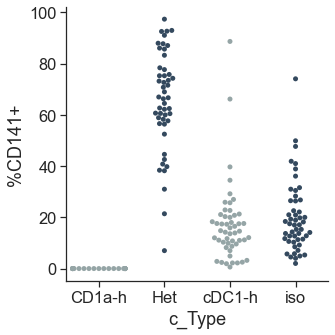

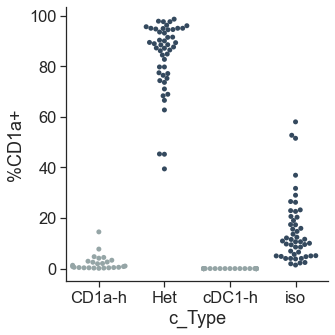

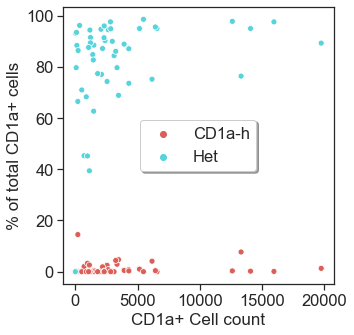

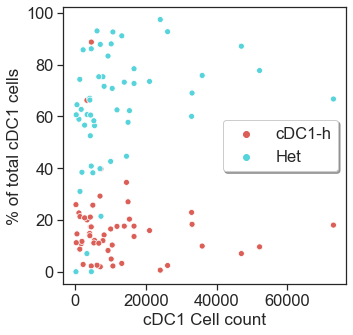

In [52]:
# Percentage of DCs dedicated in clusters (:type)
df_Cluster_pv2 = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/c_Type.txt")
df_Cluster_pts = df_Cluster_pv2[~df_Cluster_pv2["Pt"].isin(["Norm LN1x4","Norm LN2x4","Norm LN3x4","Norm LN4x4"])]
df_Cluster_pts_DCcount = df_Cluster_pts.pivot_table(index = ["Pt", "c_Type"], values=["CD141+PD-L1+","CD141+PD-L1-",
"CD1a+","CD1a+PD-L1+","CD1a+PD-L1-"], aggfunc= np.sum)
df_Cluster_pts_DCcount.reset_index(inplace = True) 

#DC count: c_type 
df_Cluster_DCs = df_Cluster_pts_DCcount[["Pt","c_Type"]]
df_Cluster_DCs["Total CD141+"]=df_Cluster_pts_DCcount["CD141+PD-L1+"]+df_Cluster_pts_DCcount["CD141+PD-L1-"]
df_Cluster_DCs["Total CD1a+"]=df_Cluster_pts_DCcount["CD1a+"]+df_Cluster_pts_DCcount["CD1a+PD-L1+"]+df_Cluster_pts_DCcount["CD1a+PD-L1-"]

# DC count: Total 
Total_DCs = df_Cluster_DCs.pivot_table(index = ["Pt"], values = ["Total CD141+", "Total CD1a+"],
aggfunc = np.sum)
Total_DCs.reset_index(inplace = True) 
Total_DCs_ = Total_DCs.rename(columns = {"Total CD141+":"Total CD141+_Sum","Total CD1a+":"Total CD1a+_Sum"}) 

# Calculate
All_ = pd.merge(df_Cluster_DCs, Total_DCs_, how = "outer")
dedication_to_cluster = All_[["Pt", "c_Type"]]
dedication_to_cluster["%CD141+"] = 100*All_["Total CD141+"]/All_["Total CD141+_Sum"]
dedication_to_cluster["%CD1a+"] = 100*All_["Total CD1a+"]/All_["Total CD1a+_Sum"]
dedication_to_cluster = dedication_to_cluster.round(1)
dedication_to_cluster.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/DCs_dedicated_to_Cluster.txt")

# plot 
names = ["%CD141+","%CD1a+"]
flatui = [  "#95a5a6",  "#34495e"]

for i, t in enumerate(names):
    sns.catplot(data = dedication_to_cluster, x ="c_Type", y = t, kind = "swarm", palette= flatui)
    

# Plot DCs count vs. % of them are found in some type of clusters
dedication_to_cluster = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/DCs_dedicated_to_Cluster.txt")
dedication_to_cluster1 = dedication_to_cluster.drop(columns="Unnamed: 0").pivot_table(index = "Pt", columns=["c_Type"])
dedication_to_cluster1.reset_index(inplace = True)
c_Type = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/c_Type.txt")
sum_dc = c_Type.pivot_table(index="Pt", aggfunc= lambda x:sum(x))
sum_dc.reset_index(inplace = True)
dc_count_to_c = sum_dc[["Pt"]]
dc_count_to_c["cDC1_ct"] = sum_dc["CD141+PD-L1+"] + sum_dc["CD141+PD-L1-"]
dc_count_to_c["CD1a+_ct"] = sum_dc["CD1a+PD-L1+"] + sum_dc["CD1a+PD-L1-"] + sum_dc["CD1a+"]
dc_count_to_c["CD1a+_%h"] = dedication_to_cluster1[( '%CD1a+', 'CD1a-h')]
dc_count_to_c["CD1a+_%het"] = dedication_to_cluster1[( '%CD1a+', 'Het')]
dc_count_to_c["cDC1_%h"] = dedication_to_cluster1[('%CD141+', 'cDC1-h')]
dc_count_to_c["cDC1_%het"] = dedication_to_cluster1[('%CD141+', 'Het')]
dc_count_to_c1 = dc_count_to_c.fillna(0)
dc_count_to_c1.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/DCs_dedicated_to_Cluster_TotDCs.txt")

# Remove Nomal samples
dc_count_to_c1 = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/DCs_dedicated_to_Cluster_TotDCs.txt")
dc_count_to_c1 = dc_count_to_c1[~dc_count_to_c1["Pt"].isin(['Norm LN1x4', 'Norm LN2x4', 'Norm LN3x4', 'Norm LN4x4'])]

# CD1a+
cd1a = dc_count_to_c1.melt(id_vars="CD1a+_ct", value_vars=["CD1a+_%h","CD1a+_%het"])
cd1a_1 = cd1a.replace({"variable":{"CD1a+_%h":"CD1a-h", "CD1a+_%het":"Het"}})
cd1a_2 = cd1a_1.rename(columns={"variable":"Type of DC clusters"})
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
plt.figure(figsize=(5.25,5))
g = sns.scatterplot(x = "CD1a+_ct", y = "value", hue = "Type of DC clusters",data = cd1a_2, palette="hls")
plt.xlabel('CD1a+ Cell count', fontsize=17)
plt.ylabel('% of total CD1a+ cells', fontsize=17)
handles, labels = g.get_legend_handles_labels()  #remove legened title
g.legend(handles=handles[1:], labels=labels[1:], loc='center', frameon=1, shadow=True)
plt.tight_layout()
g.figure.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/fig1_dedic_CD1a.tiff', format='tiff', dpi=600)
plt.show(g)

# cDC1
cDC1 = dc_count_to_c1.melt(id_vars="cDC1_ct", value_vars=["cDC1_%h","cDC1_%het"])
cDC1_1 = cDC1.replace({"variable":{"cDC1_%h":"cDC1-h", "cDC1_%het":"Het"}})
cDC1_2 = cDC1_1.rename(columns={"variable":"Type of DC clusters"})
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
plt.figure(figsize=(5.25,5))
g = sns.scatterplot(x = "cDC1_ct", y = "value", hue = "Type of DC clusters",data = cDC1_2, palette="hls")
plt.xlabel('cDC1 Cell count', fontsize=17)
plt.ylabel('% of total cDC1 cells', fontsize=17)
handles, labels = g.get_legend_handles_labels()  #remove legened title
g.legend(handles=handles[1:], labels=labels[1:], loc='center right', frameon=1, shadow=True)
plt.tight_layout()
g.figure.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/fig1_dedic_cDC1.tiff', format='tiff', dpi=600)
plt.show(g)

In [32]:
#To understand the neighborhood changes due to clustering

# Neighborhood Analysis
for sample in df_DCs.Pt.unique():
    df_test = df_DCs[(df_DCs.Pt == sample)]
    df_DCs_NNs = df_test[["Pt", "Cluster", "Phenotype", "X", "Y"]]
    df_DCs_NNs.dropna(subset=["X", "Y"])  
    df_DCs_NNs["XY"]=list(zip(df_DCs_NNs["X"], df_DCs_NNs["Y"]))
    X = df_DCs_NNs["X"]
    Y = df_DCs_NNs["Y"]
    
    dd=list(zip(X,Y))
    tri = Delaunay(dd)
    _neighbors = defaultdict(set)
    
    for simplex in tri.vertices:
        for i, j in permutations(simplex, 2):
            _neighbors[i].add(j)
                    
    points = [tuple(p) for p in tri.points]

    neighbors = {}   
    for k, v in _neighbors.items():
        neighbors[points[k]] = [points[i] for i in v]
                
    df_Neighbors=pd.DataFrame(neighbors.items()).rename(columns={0:"InitXY",1:"XY"})
    f=pd.DataFrame(df_Neighbors["XY"].tolist())
    f2=pd.DataFrame(df_Neighbors["InitXY"])
    g=pd.concat([f2, f], axis=1)
    g2=g.melt("InitXY",var_name='Order', value_name='XY')
    g3=g2.dropna(subset=["XY"]).drop("Order",1)
    sub=df_DCs_NNs[["XY","Phenotype"]]
    g4 = pd.merge(g3, sub, on='XY', how="outer")
    g5=g4.rename(columns={"Phenotype":"Neighbor_Phenotype"})
    subInit=df_DCs_NNs[["XY", "Phenotype"]]
    subInit2=subInit.rename(columns={"XY":"InitXY", "Phenotype":"Init_Phenotype"})
    g6 = pd.merge(subInit2, g5, on='InitXY', how="outer")
    filename = df_DCs_NNs.Pt.unique()[0]
    g6.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/NNs_/" + "nn_" + filename + ".csv", sep="\t")

<ipython-input-32-d75937245c46>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DCs_NNs["XY"]=list(zip(df_DCs_NNs["X"], df_DCs_NNs["Y"]))


In [294]:
# Open files Neighborhood results, put together, format as nn --> merge with DBSCAN cluster:
file = []
folder_location="C:/Users/DrHeh/Google Drive/programming/samples/NNs_"
dir=Path(folder_location)
os.chdir(folder_location)
for f in os.listdir(dir):
    if f.endswith(".csv"):
        df = pd.read_csv(f, sep ="\t")
        df["Pt"]=pd.Series(f).astype("string")[0].split(".")[-2]
        df_dcs = df[~df.Init_Phenotype.isin(["Others", "CD8+"])]
        file.append(df_dcs)
        df_nns = pd.concat(file)
df_nns.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/DCs_nn.txt")
df_nns_re = df_nns.drop(columns=["XY", "Unnamed: 0","Unnamed: 0.1" ])
df_nns_use = df_nns_re.rename(columns={"InitXY":"XY", "Init_Phenotype":"Phenotype"})
nns_counts = df_nns_use.pivot_table(index=["Pt", "XY", "Phenotype"], columns=["Neighbor_Phenotype"],
values=["Neighbor_Phenotype"], aggfunc=lambda x:len(x))
nns_counts.reset_index(inplace=True)
nns_counts["Pt2"]=nns_counts["Pt"].apply(lambda x:x.split("_")[-1])
nns = nns_counts.drop(columns="Pt")
nns_ = nns.rename(columns={"Pt2":"Pt"})
nns_["X"]=nns_["XY"].apply(lambda x: x.replace("(","").replace(")","").split(",")[0])
nns_["Y"]=nns_["XY"].apply(lambda x: x.replace("(","").replace(")","").split(",")[1])
nns_2 = nns_.drop(columns="XY")
nns_2.columns =['Phenotype', 'CD141+PD-L1+', 'CD141+PD-L1-', 'CD1a+', 'CD1a+PD-L1+','CD1a+PD-L1-', 'CD8+', 'Others', 'Pt', 'X', 'Y']
nn3=nns_2[["Pt",'Phenotype', 'CD141+PD-L1+', 'CD141+PD-L1-', 'CD1a+', 'CD1a+PD-L1+','CD1a+PD-L1-', 'CD8+', 'Others']]
nn3["X"]=nns_2["X"].astype("float64")
nn3["Y"]=nns_2["Y"].astype("float64")

# To merge nn with cluster:
df_DCs = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs1_res/Res_all.txt")
df_DCs_nn = df_DCs[["Pt", "Phenotype", "Cluster", "X", "Y"]].dropna(subset=["Cluster"])
df_DCs_nn_use_ = df_DCs_nn[~df_DCs_nn["Phenotype"].isin(["CD8+","Others"])]
df_DCs_nn_use_2=df_DCs_nn_use_[['Pt', 'Phenotype', 'Cluster']]
df_DCs_nn_use_2["X"]=df_DCs_nn_use_["X"].astype("float64")
df_DCs_nn_use_2["Y"]=df_DCs_nn_use_["Y"].astype("float64")

#Check pt name, fix names, --> merge:
Pt1=nn3["Pt"].unique()
df_pt1=pd.DataFrame(Pt1)
Pt2=df_DCs_nn_use_2["Pt"].unique()
df_pt2=pd.DataFrame(Pt2)
names = pd.concat([df_pt1,df_pt2],axis=1) 

for p, v in zip(names.iloc[:,0], names.iloc[:,1]): 
    df_DCs_nn_use_2.loc[(df_DCs_nn_use_2["Pt"]==v),"Pt"]=p

# merge
i_files=[]
for pts in nn3.Pt.unique():
    i_files.append(pd.merge(nn3[(nn3.Pt==pts)],df_DCs_nn_use_2[(df_DCs_nn_use_2.Pt==pts)]))
all_files=pd.concat(i_files)
all_files.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/nn_DCs_cluster.txt")

# append cluster type
all_files = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/nn_DCs_cluster.txt")
all_files["Pt"]=all_files["Pt"].astype("string")
all_files["Cluster"]=all_files["Cluster"].astype("int64")

df_Cluster_pv2 = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/c_Type.txt")
cluster_type = df_Cluster_pv2[["Pt", "Cluster", "c_Type"]]
cluster_type["Pt"]=cluster_type["Pt"].astype("string")
cluster_type["Cluster"]=cluster_type["Cluster"].astype("int64")

# fix the names
PtA=all_files["Pt"].unique()
df_PtA=pd.DataFrame(PtA)
PtB=cluster_type["Pt"].unique()
df_PtB=pd.DataFrame(PtB)
names_ = pd.concat([df_PtA,df_PtB],axis=1) 
for p, v in zip(names_.iloc[:,0], names_.iloc[:,1]): 
    cluster_type.loc[(cluster_type["Pt"]==v),"Pt"]=p
    
# merge
all_files_cType = pd.merge(all_files, cluster_type, how="outer")
all_files_cType.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/nn_DCs_clustera_cType.txt")

##---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plot neighborhoods #, comparing dendritic cells iso, homocluster, heterocluster
all_files_cType = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/nn_DCs_clustera_cType.txt")
cDC1_all_files_cType_spec=all_files_cType[["Pt","Phenotype","c_Type","CD141+PD-L1+","CD141+PD-L1-","CD1a+","CD1a+PD-L1+","CD1a+PD-L1-","CD8+","Others"]].fillna(0)
cDC1_all_files_cType_spec["cDC1"] = cDC1_all_files_cType_spec["CD141+PD-L1+"] + cDC1_all_files_cType_spec["CD141+PD-L1-"]
cDC1_all_files_cType_spec["CD1A"] = cDC1_all_files_cType_spec["CD1a+"] + cDC1_all_files_cType_spec["CD1a+PD-L1+"] + cDC1_all_files_cType_spec["CD1a+PD-L1-"] 
cDC1_all_files_cType_spec["Other"] = cDC1_all_files_cType_spec["CD8+"] + cDC1_all_files_cType_spec["Others"]
cDC1_all_files_cType_sim = cDC1_all_files_cType_spec[["Pt","Phenotype", "c_Type", "cDC1", "CD1A", "Other"]]
cDC1_all_files_cType_bc = cDC1_all_files_cType_sim[~cDC1_all_files_cType_sim.Pt.isin(["Norm LN1x4","Norm LN2x4","Norm LN3x4","Norm LN4x4"])]
cDC1_all_files_cType_perbc = cDC1_all_files_cType_bc.pivot_table(index=["Pt","Phenotype","c_Type"], aggfunc="mean")
cDC1_all_files_cType_perbc.reset_index(inplace = True)
cDC1_all_files_cType_perbc_simpleDC = cDC1_all_files_cType_perbc.replace({"Phenotype":{"CD141+PD-L1+":"cDC1", "CD141+PD-L1-":"cDC1",
                                                "CD1a+PD-L1+":"CD1A", "CD1a+PD-L1-":"CD1A",
                                                "CD1a+":"CD1A"}})
data_plot = pd.melt(cDC1_all_files_cType_perbc_simpleDC, id_vars=['Pt',"Phenotype",'c_Type'], value_vars = ['CD1A', 'cDC1','Other'])
data_plot2 = data_plot.replace({"c_Type":{"iso":"Iso"}})


# plot for cDC1 (iso, heterocluster, homocluster) and how many neighbors they have
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
neighbor_for_cDC1 = data_plot2[(data_plot2.Phenotype=="cDC1")]
g= sns.catplot(data= neighbor_for_cDC1, kind="bar", height = 6, aspect = .75, 
               x="c_Type", y= "value", hue="variable", palette=("crimson","deepskyblue","gainsboro"), edgecolor="0.1")
plt.xlabel('Type of DC clusters', fontsize=17)
plt.ylabel('Neighbor Cell Count',fontsize=17)
g._legend.remove()
g.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/Neighbor_for_cDC1.tiff', format='tiff', dpi=600)
plt.show()

# plot for CD1A  (iso, heterocluster, homocluster) and how many neighbors they have
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
neighbor_for_CD1A = data_plot2[(data_plot2.Phenotype=="CD1A")].replace({"variable":{"CD1A":"CD1a+", "Other":"other types"}})
g= sns.catplot(data= neighbor_for_CD1A, kind="bar", height = 6, aspect = .75, 
               x="c_Type", y= "value", order=["Het", "CD1a-h", "Iso"], hue="variable", palette=("crimson","deepskyblue","gainsboro"), edgecolor="0.1")
plt.xlabel('Type of DC clusters', fontsize=17)
plt.ylabel('Neighbor Cell Count',fontsize=17)
plt.legend(title="Neighbor Cell", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
g._legend.remove()
g.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/Neighbor_for_CD1A.tiff', format='tiff', dpi=600)
plt.show()

# p value having CD1A neighbors for cDC1 (Het vs. Iso) 
cDC1_neighborCD1A = neighbor_for_cDC1[(neighbor_for_cDC1.variable=="CD1A")][["Pt","c_Type","value"]].pivot_table(index=["Pt","c_Type"], aggfunc="mean")
cDC1_neighborCD1A.reset_index(inplace = True)
Het = cDC1_neighborCD1A[(cDC1_neighborCD1A.c_Type=="Het")]
Iso = cDC1_neighborCD1A[(cDC1_neighborCD1A.c_Type=="Iso")]
dHetIso=pd.merge(Het, Iso, on="Pt")
p_cDC1_neibrCD1A_HetvsIso = wilcoxon(dHetIso.value_x,dHetIso.value_y)[1]

# p value having cDC1 neighbors for CD1A (Het vs. Iso) 
CD1A_Het_neighborcDC1 = neighbor_for_CD1A[(neighbor_for_CD1A.c_Type=="Het") & (neighbor_for_CD1A.variable=="cDC1")][["Pt","value"]].pivot_table(index=["Pt"], aggfunc="mean").iloc[:,0].to_list()
CD1A_Iso_neighborcDC1 = neighbor_for_CD1A[(neighbor_for_CD1A.c_Type=="Iso") & (neighbor_for_CD1A.variable=="cDC1")][["Pt","value"]].pivot_table(index=["Pt"], aggfunc="mean").iloc[:,0].to_list()
p_CD1A_neibrcDC1_HetvsIso = wilcoxon(CD1A_Het_neighborcDC1,CD1A_Iso_neighborcDC1)[1]
CD1A_neighborcDC1 = neighbor_for_CD1A[(neighbor_for_CD1A.variable=="cDC1")][["Pt","c_Type","value"]].pivot_table(index=["Pt","c_Type"], aggfunc="mean")
CD1A_neighborcDC1.reset_index(inplace = True)
Het1a = CD1A_neighborcDC1[(CD1A_neighborcDC1.c_Type=="Het")]
Iso1a = CD1A_neighborcDC1[(CD1A_neighborcDC1.c_Type=="Iso")]
dHetIso1a=pd.merge(Het1a, Iso1a, on="Pt")
p_CD1A_neibrcDC1_HetvsIso = wilcoxon(dHetIso1a.value_x,dHetIso.value_y)[1]

wilcoxon = pd.DataFrame({"cDC1 have CD1A neibor, iso vs Het":p_cDC1_neibrCD1A_HetvsIso, "CD1A have cDC1 neibor, iso vs Het":[p_CD1A_neibrcDC1_HetvsIso]})
wilcoxon.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/Wilcoxon_pvalue.txt")

#----------------------------------
# Plot in Heterclusters, size of cluster vs. neighbor change (Per Pts)
SIZE_cType_Pts= pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_results/SIZE_cType_Pts.txt")
SIZE_Het = SIZE_cType_Pts.rename(columns={"Unnamed: 0":"Pt"})[["Pt","Het_size"]].replace({"Pt":{"20190222_RZ_DC PD-L1 Panel_12195-23 LNNC2x6":"12195-23 LNNC2x6",
                                                                                               "20190222_RZ_DC PD-L1 Panel_12195-09 LNNA1x5":"12195-09 LNNA1x5",
                                                                                               "20190222_RZ_DC PD-L1 Panel_12195-13 LNNA1x5":"12195-13 LNNA1x5",
                                                                                               "20190222_RZ_DC PD-L1 Panel_14346-1-37 C1x3":"14346-1-37 C1x3",
                                                                                               "20190222_RZ_DC PD-L1 Panel_14346-1-23 (Block #A2)x4":"14346-1-23 (Block #A2)x4",
                                                                                               "20190222_RZ_DC PD-L1 Panel_14346-1-28 (Block #B1)x6":"14346-1-28 (Block #B1)x6"}})
Pt_Het_cDC1_neighborCD1A = neighbor_for_cDC1[(neighbor_for_cDC1.c_Type=="Het") & (neighbor_for_cDC1.variable=="CD1A")][["Pt","value"]].pivot_table(index=["Pt"], aggfunc="mean")
Pt_Het_CD1A_neighborcDC1 = neighbor_for_CD1A[(neighbor_for_CD1A.c_Type=="Het") & (neighbor_for_CD1A.variable=="cDC1")][["Pt","value"]].pivot_table(index=["Pt"], aggfunc="mean")
First_merge = pd.merge(SIZE_Het,Pt_Het_cDC1_neighborCD1A,on=["Pt"], how="outer").rename(columns={"value":"cDC1_#nbr_CD1A"})
Second_merge = pd.merge(First_merge, Pt_Het_CD1A_neighborcDC1, on=["Pt"], how="outer").rename(columns={"value":"CD1A_#nbr_cDC1"}).dropna()


# Plot CD1A Het vs. neighbor cDC1
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
g = sns.regplot(data=Second_merge , x="Het_size", y="CD1A_#nbr_cDC1", scatter_kws={"s": 50, "color":"deepskyblue","edgecolor":"black"},
               line_kws={"color":"deepskyblue"})
plt.xlim(-10, 6000)
plt.ylim(-0.1, 1.2)

plt.xlabel('Cluster Size (Total Cells)', fontsize=17)
plt.ylabel('Neighbor Cell Count',fontsize=17)
plt.tight_layout()
g.figure.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/HetSize_vs_CD1A_neiborcDC1.tiff', format='tiff', dpi=600)
plt.show()


# Plot cDC1 Het vs. neighbor CD1A
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
g = sns.regplot(data=Second_merge , x="Het_size", y="cDC1_#nbr_CD1A", scatter_kws={"s": 50, "color":"crimson","edgecolor":"black"},
               line_kws={"color":"crimson"})
plt.xlim(-10, 6000)
plt.ylim(-0.1, 1.2)

plt.xlabel('Cluster Size (Total Cells)', fontsize=17)
plt.ylabel('Neighbor Cell Count',fontsize=17)
plt.tight_layout()
g.figure.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/HetSize_vs_cDC1_neiborCD1A.tiff', format='tiff', dpi=600)
plt.show()

## Pearson's correlation 
p_CD1A_nbr_cDC1 = pearsonr(x=Second_merge["Het_size"].to_list(), y=Second_merge["CD1A_#nbr_cDC1"].to_list())[1]
r_CD1A_nbr_cDC1 = pearsonr(x=Second_merge["Het_size"].to_list(), y=Second_merge["CD1A_#nbr_cDC1"].to_list())[0]
p_cDC1_nbr_CD1A = pearsonr(x=Second_merge["Het_size"].to_list(), y=Second_merge["cDC1_#nbr_CD1A"].to_list())[1]
r_cDC1_nbr_CD1A = pearsonr(x=Second_merge["Het_size"].to_list(), y=Second_merge["cDC1_#nbr_CD1A"].to_list())[0]
pearson = pd.DataFrame({"Het size vs cDC1 have CD1A neibor":p_cDC1_nbr_CD1A, "Het size vs CD1A have cDC1 neibor":[p_CD1A_nbr_cDC1],
                       "Het size vs cDC1 have CD1A neibor_r":r_cDC1_nbr_CD1A, "Het size vs CD1A have cDC1 neibor_r":[r_CD1A_nbr_cDC1]})
pearson.to_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/pearson_pvalue.txt")

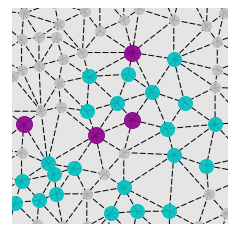

In [92]:
# Plot Delaunay Triangular 
data = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs1_res/Res_12195-22-LNNA1x4.txt")
data_reg = data[(data.X>58500) & (data.X<60800) & (data.Y>7225) & (data.Y<8250)]

Xmin = 60000
Xmax = 61000
Ymin = 7000
Ymax = 8000

data_r1 = data_reg[(data_reg.X>Xmin) & (data_reg.X<Xmax) & (data_reg.Y>Ymin) & (data_reg.Y<Ymax)]

# Neighborhood again_
data_r1.dropna(subset=["X", "Y"])
X = data_r1["X"]
Y = data_r1["Y"]
dd=list(zip(X,Y))
tri = Delaunay(dd)
points = data_r1[["X", "Y","Phenotype"]].to_numpy()
df = data_r1[["X", "Y","Phenotype"]]


def plotter(p):
  tri = Delaunay(p)
  
  plt.style.use("ggplot")
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_aspect(aspect=1)
  ax.set_xticks([])
  ax.set_xlim(60075, 60175)
  ax.set_yticks([])
  ax.set_ylim(7380, 7480)
  plt.triplot(points[:,0], points[:,1], tri.simplices.copy(), color="black", lw=1, dashes=[6, 2])
  #plt.plot(points[:,0], points[:,1],"o")
  colors = itertools.cycle(["darkmagenta", "darkmagenta", "c", "c", "silver", "silver"])
  size = itertools.cycle(["16", "16", "14", "14", "10", "10"])
  groups = df.groupby("Phenotype")  
  for name, group in groups:
    plt.plot(group["X"], group["Y"], marker="o", linestyle="", label=name, markersize=next(size), alpha= 0.9, color = next(colors))
  plt.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/Neighbors_HeteroDCs.tiff', format='tiff', dpi=600)
    
  #plt.legend()
  plt.show()
    
if __name__ == '__main__':
    plotter(dd)
    


    
    

# plot isolate_ cDC1 
data = pd.read_csv("C:/Users/DrHeh/Google Drive/programming/samples/DCs1_res/Res_12195-22-LNNA1x4.txt")
data_reg = data[(data.X>58500) & (data.X<60800) & (data.Y>7225) & (data.Y<8250)]

#C=126
#Xmin = data_reg[(data_reg.Cluster==C)].X.min()
#Xmax = data_reg[(data_reg.Cluster==C)].X.max()
#Ymin = data_reg[(data_reg.Cluster==C)].Y.min()
#Ymax = data_reg[(data_reg.Cluster==C)].Y.max()

Xmin = 59000
Xmax = 60000
Ymin = 7800
Ymax = 8800

data_r1 = data_reg[(data_reg.X>Xmin) & (data_reg.X<Xmax) & (data_reg.Y>Ymin) & (data_reg.Y<Ymax)]

# Neighborhood again_
data_r1.dropna(subset=["X", "Y"])
X = data_r1["X"]
Y = data_r1["Y"]
dd=list(zip(X,Y))
tri = Delaunay(dd)
points = data_r1[["X", "Y","Phenotype"]].to_numpy()
df = data_r1[["X", "Y","Phenotype"]]


def plotter(p):
  tri = Delaunay(p)
  
  plt.style.use("ggplot")
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_aspect(aspect=1)
  ax.set_xticks([])
  ax.set_xlim(59700, 59800)
  ax.set_yticks([])
  ax.set_ylim(8050, 8150)
  plt.triplot(points[:,0], points[:,1], tri.simplices.copy(), color="black", lw=1, dashes=[6, 2])
  #plt.plot(points[:,0], points[:,1],"o")
  colors = itertools.cycle(["darkmagenta", "darkmagenta", "c", "c", "silver", "silver"])
  size = itertools.cycle(["16", "16", "14", "14", "10", "10"])
  groups = df.groupby("Phenotype")  
  for name, group in groups:
    plt.plot(group["X"], group["Y"], marker="o", linestyle="", label=name, markersize=next(size), alpha= 0.9, color = next(colors))
  plt.savefig('C:/Users/DrHeh/Google Drive/programming/samples/DCs_neighbors/Neighbors_iso_DCs.tiff', format='tiff', dpi=600)
    
  #plt.legend()
  plt.show()
    
if __name__ == '__main__':
    plotter(dd)
    